In [6]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

1/1 [==============================] - 1s 1s/step


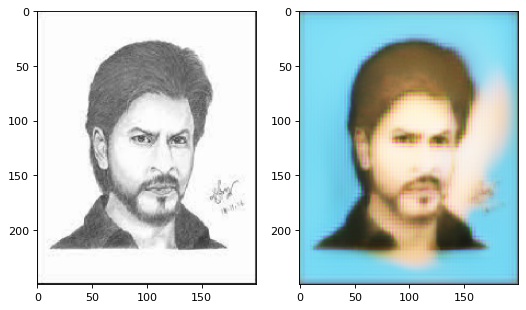

In [7]:
# Load Model
g_model = load_model('C:/Users/sneha/Desktop/SketchToImage/SketchToImage/generator_model.h5',custom_objects={'InstanceNormalization':InstanceNormalization})

# load and resize the image
img = load_img('C:/Users/sneha/Downloads/download (1).jpg ', target_size=(256, 256))
#target = cv2.cvtColor(cv2.imread('Dataset/CUHK/Testing photo/m1-001-01.jpg'), cv2.COLOR_BGR2RGB)

# convert to numpy array
img = img_to_array(img)
norm_img = (img.copy() - 127.5) / 127.5

g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
g_img = g_img * 127.5 + 127.5

img = cv2.resize(img, (200, 250))
g_img = cv2.resize(g_img, (200, 250))

f = plt.figure(num=None, figsize=(12, 6), dpi=80)
ax1 = f.add_subplot(1,3, 1)
plt.imshow(img.astype('uint8'))
ax2 = f.add_subplot(1,3, 2)
plt.imshow(g_img.astype('uint8'))
#ax3 = f.add_subplot(1,3, 3)
#plt.imshow(target.astype('uint8'))
#ax1.set_title('Sketch')
#ax2.set_title('Generated Image')
#ax3.set_title('Target Image')

plt.show(block=True)


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Load Model
g_model = load_model('C:/Users/sneha/Desktop/SketchToImage/SketchToImage/generator_model.h5',custom_objects={'InstanceNormalization':InstanceNormalization})
file_name = ""
def browse_image():
    filename = filedialog.askopenfilename()
    print("Selected Image Path:", filename)
    show_image(filename)
    print("selcted image processing it.")
    global file_name
    file_name = filename

def show_image(filename):
   
    original_image = Image.open(filename)
    original_image.thumbnail((300, 300))  # Resize image if it's too large
    original_image_tk = ImageTk.PhotoImage(original_image)
    original_label.config(image=original_image_tk)
    original_label.image = original_image_tk
    

def process_image():
    global file_name

    # load and resize the image
    img = load_img(file_name, target_size=(256, 256))
    #target = cv2.cvtColor(cv2.imread('Dataset/CUHK/Testing photo/m1-001-01.jpg'), cv2.COLOR_BGR2RGB)
    
    # convert to numpy array
    img = img_to_array(img)
    norm_img = (img.copy() - 127.5) / 127.5
    
    g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
    g_img = g_img * 127.5 + 127.5
    
    img = cv2.resize(img, (200, 250))
    g_img = cv2.resize(g_img, (200, 250))
    
    # # Show grayscale image
    # grayscale_image = original_image.convert("L")
    # g_img_pil = Image.fromarray(cv2.cvtColor(g_img.astype('uint8'), cv2.COLOR_BGR2RGB))
    g_img_pil = Image.fromarray(g_img.astype('uint8'))
    # Resize the image
    g_img_pil_resized = g_img_pil.resize((200, 250))
    # Convert PIL image to Tkinter compatible format
    g_img_tk = ImageTk.PhotoImage(g_img_pil_resized)

    # Display the image in the GUI
    grayscale_label.config(image=g_img_tk)
    grayscale_label.image = g_img_tk
    # grayscale_image_tk = ImageTk.PhotoImage(g_img.astype('uint8'))
    # grayscale_label.config(image=grayscale_image_tk)
    # grayscale_label.image = grayscale_image_tk

def close_application():
    root.destroy()
# Create main window
root = tk.Tk()
root.title("Image Viewer")
root.geometry("500x300")


# Create frames for layout
top_frame = tk.Frame(root, bg="lightgray", padx=10, pady=10)
top_frame.pack(fill=tk.BOTH, expand=True)

bottom_frame = tk.Frame(root, bg="lightgray", padx=10, pady=10)
bottom_frame.pack(fill=tk.BOTH, expand=True)

# Create button to browse image
browse_button = tk.Button(root, text="Browse Sketch", command=browse_image, bg="skyblue", fg="white", padx=10, pady=5)
browse_button.pack(side=tk.LEFT)

close_button = tk.Button(root, text="Process", command=process_image,bg="skyblue", fg="white", padx=10, pady=5)
close_button.pack(side=tk.LEFT)

close_button = tk.Button(root, text="Close", command=close_application,bg="skyblue", fg="white", padx=10, pady=5)
close_button.pack(side=tk.LEFT)

# Create labels to display images
original_label = tk.Label(bottom_frame)
original_label.pack(side=tk.LEFT, padx=10)

grayscale_label = tk.Label(bottom_frame)
grayscale_label.pack(side=tk.LEFT, padx=10)


root.mainloop()


Selected Image Path: C:/Users/sneha/Downloads/download (1).jpg
selcted image processing it.
1/1 [==============================] - 1s 859ms/step
